In [1]:
#Import the libraries
import math
import pandas_datareader as web 
import numpy as np 
import pandas as pd
from pandas.util.testing import assert_frame_equal
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

/Users/josh/opt/anaconda3/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
Using TensorFlow backend.


In [2]:
#By using DataReader we will get the stock quote from Yahoo Finance
df = web.DataReader('REGN', data_source = 'yahoo', start = '2019-03-09', end = '2020-03-09')
#Show the data
df


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-03-11,413.209991,402.250000,404.149994,412.049988,874200,412.049988
2019-03-12,421.799988,411.190002,413.559998,417.619995,839700,417.619995
2019-03-13,419.600006,408.529999,419.380005,409.010010,988800,409.010010
2019-03-14,412.359985,406.339996,409.890015,407.500000,925200,407.500000
2019-03-15,415.000000,408.399994,408.470001,414.470001,1158500,414.470001
...,...,...,...,...,...,...
2020-03-03,467.690002,448.109985,454.720001,461.549988,1210600,461.549988
2020-03-04,494.559998,467.130005,467.959991,493.480011,1960700,493.480011
2020-03-05,500.000000,480.000000,480.940002,488.170013,1270200,488.170013


In [3]:
#Get the number of rows and columns in the data set
df.shape

(252, 6)

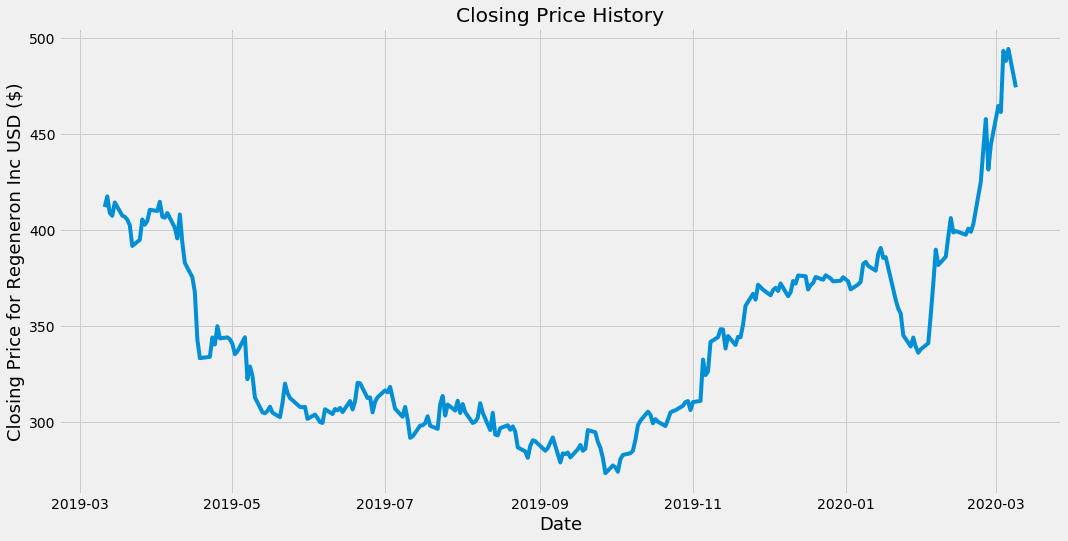

In [4]:
#Visualize the closing price history 
plt.figure(figsize=(16,8))
plt.title('Closing Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closing Price for Regeneron Inc USD ($)', fontsize=18)
plt.show()

In [5]:
#Create a new dataframe with only the "Close" column
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on 
training_data_len = math.ceil( len(dataset) * .8)

training_data_len

202

In [6]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.62718919],
       [0.65239627],
       [0.61343177],
       [0.60659822],
       [0.63814096],
       [0.60705079],
       [0.60429017],
       [0.59754721],
       [0.58437799],
       [0.53554779],
       [0.55002945],
       [0.59809025],
       [0.58564512],
       [0.59451507],
       [0.62071776],
       [0.61813819],
       [0.63972492],
       [0.60433547],
       [0.60220847],
       [0.61311495],
       [0.57835913],
       [0.55333312],
       [0.60990188],
       [0.54315074],
       [0.49545192],
       [0.46178218],
       [0.42643803],
       [0.31456763],
       [0.27098703],
       [0.27410964],
       [0.31986253],
       [0.30320858],
       [0.3463366 ],
       [0.31769024],
       [0.31990769],
       [0.31533703],
       [0.30470207],
       [0.28035485],
       [0.28705264],
       [0.32026981],
       [0.22147804],
       [0.25134637],
       [0.22948826],
       [0.17830472],
       [0.14341314],
       [0.14101463],
       [0.14658105],
       [0.156

In [7]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len , :]
#Split the data into x train and y train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i , 0])
    y_train.append(train_data[i, 0])
    if i<=60: 
        print(x_train)
        print(y_train)
        print()

[array([0.62718919, 0.65239627, 0.61343177, 0.60659822, 0.63814096,
       0.60705079, 0.60429017, 0.59754721, 0.58437799, 0.53554779,
       0.55002945, 0.59809025, 0.58564512, 0.59451507, 0.62071776,
       0.61813819, 0.63972492, 0.60433547, 0.60220847, 0.61311495,
       0.57835913, 0.55333312, 0.60990188, 0.54315074, 0.49545192,
       0.46178218, 0.42643803, 0.31456763, 0.27098703, 0.27410964,
       0.31986253, 0.30320858, 0.3463366 , 0.31769024, 0.31990769,
       0.31533703, 0.30470207, 0.28035485, 0.28705264, 0.32026981,
       0.22147804, 0.25134637, 0.22948826, 0.17830472, 0.14341314,
       0.14101463, 0.14658105, 0.15649191, 0.14246283, 0.13173741,
       0.16513563, 0.21102414, 0.18916603, 0.17694712, 0.15599403,
       0.15531523, 0.15612979, 0.12789071, 0.13798262, 0.12942936])]
[0.12010683983485126]



In [8]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [9]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(142, 60, 1)

In [10]:
#Build the LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [11]:
#Compile the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [12]:
#Train the model
model.fit(x_train,y_train, batch_size=1, epochs=1)

Epoch 1/1
142/142 [==============================] - 12s 87ms/step - loss: 0.0060


In [13]:
#Create the testing data set
#Create a new array containing scaled vals from index 1543 to 2020
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [14]:
#Convert the data to a numpy array
x_test = np.array(x_test)

In [15]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [16]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [17]:
#Get the root mean squared error (RMSE)
rmse = np.sqrt( np.mean( predictions - y_test )**2 )
rmse

37.061533813476565

/Users/josh/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


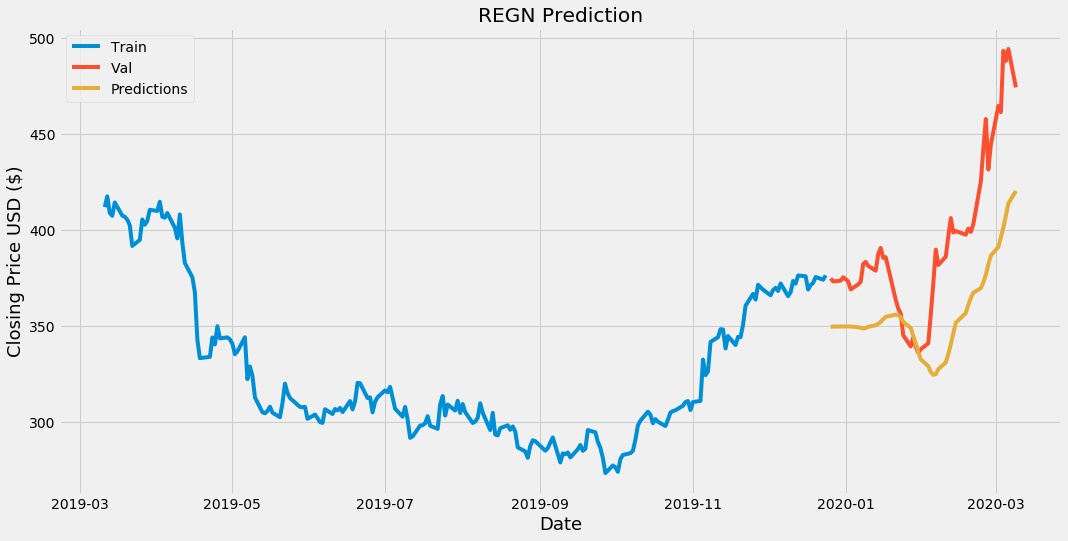

In [18]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('REGN Prediction')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closing Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='upper left')
plt.show()

In [19]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2019-12-26,374.859985,349.623383
2019-12-27,373.320007,349.784637
2019-12-30,373.700012,349.839081
2019-12-31,375.480011,349.830383
2020-01-02,373.350006,349.862854
2020-01-03,369.160004,349.808868
2020-01-06,371.739990,349.484436
2020-01-07,373.130005,349.121643
2020-01-08,382.420013,348.818146


In [20]:
#Get the quote
regn_quote = web.DataReader('REGN',  data_source = 'yahoo', start = '2019-04-24', end = '2020-04-24')
#Create a new dataframe
new_df = regn_quote.filter(['Close'])
#Get the last 60 day closing price values and conver the dataframe to an array 
last_60_days= new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append the past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a nuympy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[483.61023]]


In [21]:
#Get the quote
regn_quote2 = web.DataReader('REGN',  data_source = 'yahoo', start = '2020-04-24', end = '2020-04-24')
print(regn_quote2['Close'])

Date
2020-04-24    566.210022
Name: Close, dtype: float64
